In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pyhdf.SD import SD, SDC
import pprint
import matplotlib.pyplot as plt

In [3]:
#https://clouds.eos.ubc.ca/~phil/courses/atsc301_2012/modisII.html
geo_file = '/work/bb1036/b381362/dataset/MYD03.A2013122.1140.061.2018046005026.hdf'
file_geo = SD(geo_file, SDC.READ)

In [4]:
print(file_geo.info())

datasets_dic = file_geo.datasets()

for idx, sds in enumerate(datasets_dic.keys()):
    print(idx, sds)
    

(46, 27)
0 Latitude
1 Longitude
2 Scan Offset
3 Track Offset
4 Height Offset
5 Height
6 SensorZenith
7 SensorAzimuth
8 Range
9 SolarZenith
10 SolarAzimuth
11 Land/SeaMask
12 WaterPresent
13 gflags
14 Scan number
15 EV frames
16 SD frames
17 SV frames
18 EV start time
19 SD start time
20 SV start time
21 EV center time
22 Mirror side
23 SD Sun zenith
24 SD Sun azimuth
25 Moon Vector
26 L1 scan quality
27 Geo scan quality
28 orb_pos
29 orb_vel
30 T_inst2ECR
31 attitude_angles
32 sun_ref
33 num_impulse
34 impulse_enc
35 impulse_time
36 Scan Type
37 thermal_correction
38 attitude_quality
39 ephemeris_quality
40 Focal_length
41 band_position
42 detector_space
43 detector_offsets
44 T_offset
45 num_samples


In [5]:
lat = file_geo.select('Latitude')
latitude = lat[:,:]
lon = file_geo.select('Longitude')
longitude = lon[:,:]


In [6]:
np.shape(latitude), np.shape(lon)

((2030, 1354), (2030, 1354))

In [7]:
latitude

array([[42.505573, 42.50466 , 42.503727, ..., 38.645954, 38.6315  ,
        38.61691 ],
       [42.523685, 42.522717, 42.521725, ..., 38.662865, 38.648457,
        38.63392 ],
       [42.541798, 42.54077 , 42.539726, ..., 38.67977 , 38.665413,
        38.65092 ],
       ...,
       [60.435436, 60.436813, 60.43811 , ..., 54.942577, 54.91897 ,
        54.896355],
       [60.453594, 60.454926, 60.456173, ..., 54.957535, 54.93427 ,
        54.912216],
       [60.471756, 60.47303 , 60.474213, ..., 54.972202, 54.94949 ,
        54.927628]], dtype=float32)

# MYD021KM

In [ ]:
os.chdir('/work/bb1036/b381362/dataset')

In [16]:
# Read dataset.
modis_file = 'MYD021KM.A2013122.1140.061.2018046032403.hdf'
file = SD(modis_file, SDC.READ)

In [17]:
print(file.info())

datasets_dic = file.datasets()

for idx, sds in enumerate(datasets_dic.keys()):
    print(idx, sds)
    

(31, 58)
0 Latitude
1 Longitude
2 EV_1KM_RefSB
3 EV_1KM_RefSB_Uncert_Indexes
4 EV_1KM_Emissive
5 EV_1KM_Emissive_Uncert_Indexes
6 EV_250_Aggr1km_RefSB
7 EV_250_Aggr1km_RefSB_Uncert_Indexes
8 EV_250_Aggr1km_RefSB_Samples_Used
9 EV_500_Aggr1km_RefSB
10 EV_500_Aggr1km_RefSB_Uncert_Indexes
11 EV_500_Aggr1km_RefSB_Samples_Used
12 Height
13 SensorZenith
14 SensorAzimuth
15 Range
16 SolarZenith
17 SolarAzimuth
18 gflags
19 EV_Band26
20 EV_Band26_Uncert_Indexes
21 Band_250M
22 Band_500M
23 Band_1KM_RefSB
24 Band_1KM_Emissive
25 Noise in Thermal Detectors
26 Change in relative responses of thermal detectors
27 DC Restore Change for Thermal Bands
28 DC Restore Change for Reflective 250m Bands
29 DC Restore Change for Reflective 500m Bands
30 DC Restore Change for Reflective 1km Bands


In [18]:
lat = file.select('Latitude')
latitude = lat[:,:]
lon = file.select('Longitude')
longitude = lon[:,:]

In [19]:
print(np.shape(latitude),np.shape(longitude),np.shape(lat))

(406, 271) (406, 271) (406, 271)


In [20]:
lat

In [21]:
longitude

array([[35.675884 , 35.390835 , 35.116325 , ...,  9.124578 ,  8.8794985,
         8.625549 ],
       [35.673347 , 35.387905 , 35.113033 , ...,  9.08714  ,  8.84123  ,
         8.586411 ],
       [35.669426 , 35.38387  , 35.108875 , ...,  9.082918 ,  8.837703 ,
         8.583616 ],
       ...,
       [34.605858 , 34.18043  , 33.768627 , ..., -3.0598266, -3.3685663,
        -3.6853971],
       [34.59525  , 34.170452 , 33.758606 , ..., -3.0683258, -3.3760862,
        -3.6917505],
       [34.603275 , 34.176346 , 33.764202 , ..., -3.1427853, -3.4543571,
        -3.7708364]], dtype=float32)

### Bands

In [165]:
band_sds_250_RefSB = file.select('Band_250M')
band_sds_500_RefSB = file.select('Band_500M')
band_sds_1_RefSB = file.select('Band_1KM_RefSB')
band_sds_1_Ems = file.select('Band_1KM_Emissive')

band_list ={'band_sds_250_RefSB':band_sds_250_RefSB , 'band_sds_500_RefSB': band_sds_500_RefSB,'band_sds_1_RefSB':band_sds_1_RefSB, 
            'band_sds_1_Ems':band_sds_1_Ems}

for x in band_list.keys():
    print(band_list[x].attributes())
    print(f'modis channels \n{band_list[x].get()}')  #get=values

{'long_name': '250M Band Numbers for Subsetting'}
modis channels 
[1. 2.]
{'long_name': '500M Band Numbers for Subsetting'}
modis channels 
[3. 4. 5. 6. 7.]
{'long_name': '1KM Reflective Solar Band Numbers for Subsetting'}
modis channels 
[ 8.   9.  10.  11.  12.  13.  13.5 14.  14.5 15.  16.  17.  18.  19.
 26. ]
{'long_name': '1KM Emissive Band Numbers for Subsetting'}
modis channels 
[20. 21. 22. 23. 24. 25. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.]


## Radiance

In [270]:
sds_250_RefSB = file.select('EV_250_Aggr1km_RefSB')
sds_data_250_RefSB=sds_250_RefSB.get()  #values
sds_500_RefSB = file.select('EV_500_Aggr1km_RefSB')
sds_1_RefSB = file.select('EV_1KM_RefSB')
sds_1_Ems = file.select('EV_1KM_Emissive')
#help(sds_250_RefSB.info)

In [271]:
sds_list= { 'sds_250_RefSB': sds_250_RefSB, 'sds_500_RefSB': sds_500_RefSB,'sds_1_RefSB':sds_1_RefSB, 
            'sds_1_Ems':sds_1_Ems}

In [272]:
np.shape(sds_250_RefSB),sds_250_RefSB

((2, 2030, 1354), <pyhdf.SD.SDS at 0x18804850b50>)

In [273]:
sds_data_250_RefSB

array([[[ 1151,  1149,  1158, ...,  1408,  1404,  1410],
        [ 1147,  1144,  1153, ...,  1402,  1398,  1397],
        [ 1148,  1143,  1146, ...,  1390,  1398,  1397],
        ...,
        [ 1267,  1375,  1348, ...,  5677,  6017,  6282],
        [ 1262,  1275,  1269, ...,  6155,  5924,  6591],
        [ 1275,  1357,  1280, ...,  6305,  6326,  7100]],

       [[ 1094,  1090,  1100, ...,  1884,  1877,  1884],
        [ 1092,  1092,  1097, ...,  1876,  1872,  1869],
        [ 1094,  1089,  1088, ...,  1859,  1870,  1867],
        ...,
        [ 5205,  4754,  5352, ..., 12982, 13849, 14621],
        [ 4956,  4929,  5292, ..., 13886, 13682, 15145],
        [ 4041,  5093,  5295, ..., 14383, 14762, 16294]]], dtype=uint16)

In [274]:
sds_250_RefSB.attributes()

{'long_name': 'Earth View 250M Aggregated 1km Reflective Solar Bands Scaled Integers',
 'units': 'none',
 'valid_range': [0, 32767],
 '_FillValue': 65535,
 'band_names': '1,2',
 'radiance_scales': [0.025139465928077698, 0.008537258952856064],
 'radiance_offsets': [-0.0, -0.0],
 'radiance_units': 'Watts/m^2/micrometer/steradian',
 'reflectance_scales': [4.989365334040485e-05, 2.748476435954217e-05],
 'reflectance_offsets': [-0.0, -0.0],
 'reflectance_units': 'none',
 'corrected_counts_scales': [0.12497329711914062, 0.12497329711914062],
 'corrected_counts_offsets': [-0.0, -0.0],
 'corrected_counts_units': 'counts'}

In [275]:
for x in sds_list.keys():
    print(x)

sds_250_RefSB
sds_500_RefSB
sds_1_RefSB
sds_1_Ems


In [276]:
scale_list= { 'reflectance_scales_sds_250_RefSB':[] , 'reflectance_scales_sds_500_RefSB':[] ,
             'reflectance_scales_sds_1_RefSB':[],
             'radiance_scales_sds_250_RefSB':[] , 'radiance_scales_sds_500_RefSB': [],
              'radiance_scales_sds_1_RefSB':[], 'radiance_scales_sds_1_Ems':[]
            }
offset_list= {'reflectance_offsets_sds_250_RefSB':[] , 'reflectance_offsets_sds_500_RefSB':[] ,
             'reflectance_offsets_sds_1_RefSB':[],
             'radiance_offsets_sds_250_RefSB':[] , 'radiance_offsets_sds_500_RefSB': [],
              'radiance_offsets_sds_1_RefSB':[], 'radiance_offsets_sds_1_Ems':[]
            }

In [284]:
for x in sds_list.keys():   
    for out_type in ['radiance', 'reflectance']:
        #print(np.shape(sds_list[x]))
        
        if( not(x == 'sds_1_Ems' and out_type =='reflectance')):
            #print(x)
            scale_name=out_type+'_scales'+ '_'+x
            offset_name=out_type+'_offsets'+ '_'+x   
            scale_list[scale_name]=sds_list[x].attributes()[out_type+'_scales'] 
            offset_list[offset_name]=sds_list[x].attributes()[out_type+'_offsets']     

In [285]:
pprint.pprint ("Values scales and offset :" + str(dict(scale_list)))

("Values scales and offset :{'reflectance_scales_sds_250_RefSB': "
 '[4.989365334040485e-05, 2.748476435954217e-05], '
 "'reflectance_scales_sds_500_RefSB': [3.7117762985872105e-05, "
 '3.2457330235047266e-05, 3.3376694773323834e-05, 3.604482481023297e-05, '
 "2.9253666070871986e-05], 'reflectance_scales_sds_1_RefSB': "
 '[1.81203504325822e-05, 1.017170689010527e-05, 6.501852112705819e-06, '
 '5.071646683063591e-06, 4.006120434496552e-06, 2.3566251456941245e-06, '
 '1.1365876844138256e-06, 2.4053590550465742e-06, 8.749219091441773e-07, '
 '2.2735976017429493e-06, 2.0063653209945187e-06, 2.1722687961300835e-05, '
 '3.39315265591722e-05, 2.5402141545782797e-05, 2.4761307940934785e-05], '
 "'radiance_scales_sds_250_RefSB': [0.025139465928077698, "
 "0.008537258952856064], 'radiance_scales_sds_500_RefSB': "
 '[0.024286113679409027, 0.018969913944602013, 0.004967000801116228, '
 "0.00271743000485003, 0.0008286003721877933], 'radiance_scales_sds_1_RefSB': "
 '[0.009923245757818222, 0.0060753

In [286]:
#for x in sds_list.keys(): 
 #  pprint.pprint(sds_list[x].attributes()) 

In [287]:
radiance_list= { 'radiance_sds_250_RefSB': [], 'radiance_sds_500_RefSB': [],'radiance_sds_1_RefSB':[], 
            'radiance_sds_1_Ems':[]}

for x in sds_list.keys(): #for key, value in sds_list.items():
    radiance_list['radiance_'+x] = np.zeros(np.shape(sds_list[x]))
    print('radiance_'+x,np.shape(radiance_list['radiance_'+x] ))

radiance_sds_250_RefSB (2, 2030, 1354)
radiance_sds_500_RefSB (5, 2030, 1354)
radiance_sds_1_RefSB (15, 2030, 1354)
radiance_sds_1_Ems (16, 2030, 1354)


In [292]:
for x in sds_list.keys():
    n_bands=len(band_list['band_'+x].get())
    for band in range(n_bands):
        radiance_list['radiance_'+ x][band] = (sds_list[x][band] - offset_list['radiance_offsets_'+ x][band]) * scale_list['radiance_scales_'+ x][band]
#a = 7
#B = np.array([[1,2],
#     [3,4]])
#(B-1)*a
#(data_raw_250_Ref_correct==radiance_list['radiance_sds_250_RefSB']).all()    

In [297]:
#radiance_list['radiance_sds_250_RefSB']
#radiance_list['radiance_sds_250_RefSB'].max()

In [300]:
sds_list

{'sds_250_RefSB': <pyhdf.SD.SDS at 0x18804850b50>,
 'sds_500_RefSB': <pyhdf.SD.SDS at 0x18804850400>,
 'sds_1_RefSB': <pyhdf.SD.SDS at 0x18804850be0>,
 'sds_1_Ems': <pyhdf.SD.SDS at 0x18804850ee0>}

In [325]:
for x in band_list.keys():
    print(band_list[x].attributes()['long_name'])

250M Band Numbers for Subsetting
500M Band Numbers for Subsetting
1KM Reflective Solar Band Numbers for Subsetting
1KM Emissive Band Numbers for Subsetting


In [334]:
for x in band_list.keys():
    a=band_list[x].attributes()['long_name']
    print(f'modis {a} \n {band_list[x].get()}')  #get=values
  

modis 250M Band Numbers for Subsetting 
 [1. 2.]
modis 500M Band Numbers for Subsetting 
 [3. 4. 5. 6. 7.]
modis 1KM Reflective Solar Band Numbers for Subsetting 
 [ 8.   9.  10.  11.  12.  13.  13.5 14.  14.5 15.  16.  17.  18.  19.
 26. ]
modis 1KM Emissive Band Numbers for Subsetting 
 [20. 21. 22. 23. 24. 25. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.]


In [336]:
radiance_list.keys()

dict_keys(['radiance_sds_250_RefSB', 'radiance_sds_500_RefSB', 'radiance_sds_1_RefSB', 'radiance_sds_1_Ems'])

In [359]:
radiance_list['radiance_sds_250_RefSB']

array([[[ 28.93552528,  28.88524635,  29.11150154, ...,  35.39636803,
          35.29581016,  35.44664696],
        [ 28.83496742,  28.75954902,  28.98580422, ...,  35.24553123,
          35.14497337,  35.1198339 ],
        [ 28.86010689,  28.73440956,  28.80982795, ...,  34.94385764,
          35.14497337,  35.1198339 ],
        ...,
        [ 31.85170333,  34.56676565,  33.88800007, ..., 142.71674807,
         151.26416649, 157.92612496],
        [ 31.726006  ,  32.05281906,  31.90198226, ..., 154.73341279,
         148.92619616, 165.69421993],
        [ 32.05281906,  34.11425526,  32.17851639, ..., 158.50433268,
         159.03226146, 178.49020809]],

       [[  9.33976129,   9.30561226,   9.39098485, ...,  16.08419587,
          16.02443505,  16.08419587],
        [  9.32268678,   9.32268678,   9.36537307, ...,  16.0158978 ,
          15.98174876,  15.95613698],
        [  9.33976129,   9.297075  ,   9.28853774, ...,  15.87076439,
          15.96467424,  15.93906246],
        ...,


In [358]:
data_raw_250_Ref_correct

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [363]:
data_radiances_38bands = np.concatenate((radiance_list['radiance_sds_250_RefSB'],radiance_list['radiance_sds_500_RefSB'],radiance_list['radiance_sds_1_RefSB'],radiance_list['radiance_sds_1_Ems']))
np.shape(data_radiances_38bands)

(38, 2030, 1354)

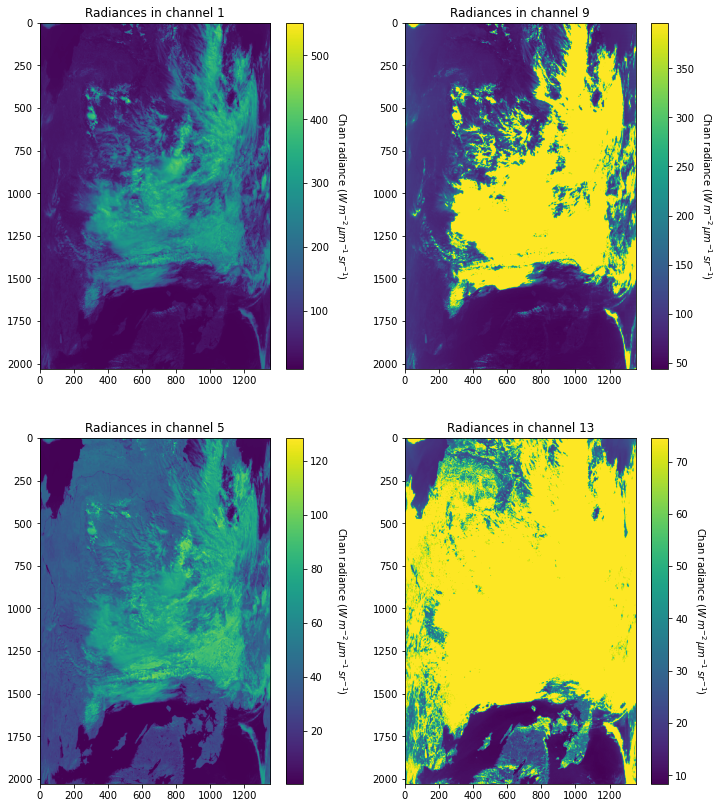

In [368]:
fig,axs = plt.subplots(2,2,figsize = (12,14))

band=0
for col in range(2):
    for row in range(2):
        ax = axs[row, col]
        pcm = ax.imshow(data_radiances_38bands[band])
        cax=fig.colorbar(pcm, ax=ax)
        out2=cax.ax.set_ylabel('Chan radiance $(W\,m^{-2}\,\mu m^{-1}\,sr^{-1})$')
        out2.set_verticalalignment('bottom')
        out2.set_rotation(270)
        ax.set_title('Radiances in channel %d'% (band+1))

        band=band+4

plt.show()

In [407]:
# Create an HDF file 30 channel
outname="MODIS_radiances_38bands.hdf"
sd = SD(outname, SDC.WRITE | SDC.CREATE)

# Create a dataset
sds = sd.create("radiances_38bands", SDC.FLOAT64, data_radiances_38bands.shape)

# Fill the dataset with a fill value
sds.setfillvalue(0)

# Set dimension names
dim1 = sds.dim(0)
dim1.setname("row")
dim2 = sds.dim(1)
dim2.setname("col")

# Assign an attribute to the dataset
sds.units = "W/m^2/micron/sr"

# Write data
sds[:,:] = data_radiances_38bands

# Close the dataset
sds.endaccess()

# Flush and close the HDF file
sd.end()

In [400]:
%ls

 Volume in drive C is OS
 Volume Serial Number is C217-23DD

 Directory of C:\Users\jesse\OneDrive\Documents\thesis

13/08/2021  00:54    <DIR>          .
13/08/2021  00:54    <DIR>          ..
12/08/2021  23:59    <DIR>          .ipynb_checkpoints
09/07/2021  11:09        49.383.819 audio_only.m4a
13/08/2021  00:48     1.671.165.209 data_radiances_38bands.hdf
12/08/2021  22:27           702.058 modis_granule_rgb.png
18/06/2021  00:26       152.635.841 MYD021KM.A2013122.1140.061.2018046032403.hdf
21/06/2021  23:30               239 MYD021KM.A2013122.1140.061.2018046032403.nc.pid10164.ncks.tmp
21/06/2021  23:30               239 MYD021KM.A2013122.1140.061.2018046032403.nc.pid20988.ncks.tmp
24/06/2021  22:48       274.646.680 output-data_rttov_T12.nc
12/08/2021  15:14         3.491.897 output-data_rttov_T12.nc.aux.xml
09/08/2021  15:20         6.380.001 PCA-MODIS.ipynb
13/08/2021  00:54         1.571.299 PCA-radiances.ipynb
09/07/2021  11:09                92 playback.m3u
09/07/2021  11:

In [387]:
!ncdump -h 'data_radiances_38bands.hdf'

ncdump: 'data_radiances_38bands.hdf': No such file or directory


In [389]:
# Read dataset.
modis_file = 'data_radiances_38bands.hdf'
file2 = SD(modis_file, SDC.READ)

In [410]:
!ncdump -h 'OneDrive/Documents/thesis/MYD021KM.A2013122.1140.061.2018046032403.hdf'


ncdump: 'OneDrive/Documents/thesis/MYD021KM.A2013122.1140.061.2018046032403.hdf': No such file or directory


In [408]:
%ls

 Volume in drive C is OS
 Volume Serial Number is C217-23DD

 Directory of C:\Users\jesse\OneDrive\Documents\thesis

13/08/2021  01:16    <DIR>          .
13/08/2021  01:16    <DIR>          ..
13/08/2021  00:59    <DIR>          .ipynb_checkpoints
09/07/2021  11:09        49.383.819 audio_only.m4a
13/08/2021  00:56     1.671.165.209 data_radiances_38bands.hdf
12/08/2021  22:27           702.058 modis_granule_rgb.png
13/08/2021  00:58     1.671.165.201 MODIS_radiances_38bands.hdf
18/06/2021  00:26       152.635.841 MYD021KM.A2013122.1140.061.2018046032403.hdf
21/06/2021  23:30               239 MYD021KM.A2013122.1140.061.2018046032403.nc.pid10164.ncks.tmp
21/06/2021  23:30               239 MYD021KM.A2013122.1140.061.2018046032403.nc.pid20988.ncks.tmp
24/06/2021  22:48       274.646.680 output-data_rttov_T12.nc
12/08/2021  15:14         3.491.897 output-data_rttov_T12.nc.aux.xml
13/08/2021  01:15         5.209.954 PCA-MODIS.ipynb
13/08/2021  01:16         1.567.464 PCA-radiances.ipynb


## RGB

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


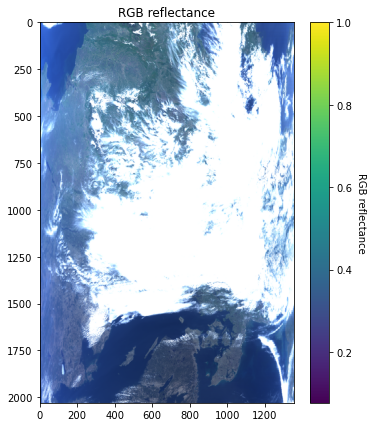

In [311]:
reflectance_RGB = np.zeros((2030, 1354,3))
name_data= 'sds_250_RefSB'
reflectance_RGB[:,:,0]= ((sds_list[name_data][0] - offset_list['radiance_offsets_'+ name_data][0]) * scale_list['radiance_scales_'+ name_data][0])
name_data= 'sds_500_RefSB'
reflectance_RGB[:,:,1]= ((sds_list[name_data][1] - offset_list['radiance_offsets_'+ name_data][1]) * scale_list['radiance_scales_'+ name_data][1]) 
reflectance_RGB[:,:,2]= ((sds_list[name_data][0] - offset_list['radiance_offsets_'+ name_data][0]) * scale_list['radiance_scales_'+ name_data][0])

fig,ax = plt.subplots(1,1,figsize = (6,7))
CS=ax.imshow(reflectance_RGB/reflectance_RGB.max()*6)

cax=fig.colorbar(CS)
ax.set_title('RGB reflectance')

out=cax.ax.set_ylabel('RGB reflectance') #out=cax.ax.set_ylabel('RGB radiance $(W\,m^{-2}\,\mu m^{-1}\,sr^{-1})$')
out.set_verticalalignment('bottom')
out.set_rotation(270)

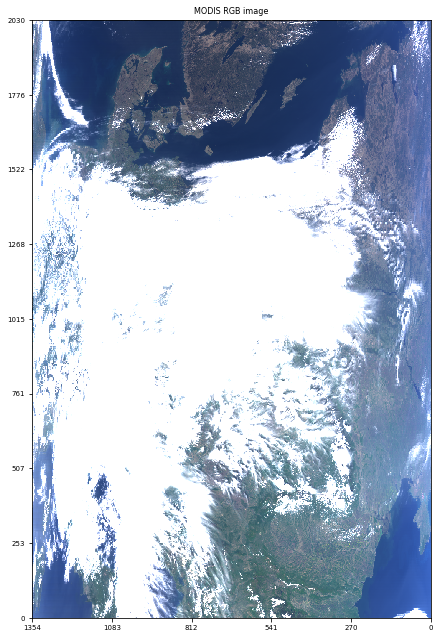

In [313]:
norme = 0.2 # 0,4factor to increase the brightness ]0,1]

rgb_out= np.zeros((along_track, cross_trak,3))

rgb_out= reflectance_RGB / norme

rgb_out[ rgb_out > 1 ] = 1.0
rgb_out[ rgb_out < 0 ] = 0.0


fig = plt.figure(figsize =(11,11))

ax = fig.add_subplot(111)

img = plt.imshow(np.fliplr(rgb), interpolation='nearest', origin='lower')

l = [int(i) for i in np.linspace(0,cross_trak,6)]
plt.xticks(l, [i for i in reversed(l)], rotation=0, fontsize=7 )

l = [int(i) for i in np.linspace(0,along_track,9)]
plt.yticks(l, l, rotation=0, fontsize=7 )

plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

plt.title('MODIS RGB image', fontsize=8)

plt.savefig("modis_granule_rgb.png", bbox_inches='tight', dpi=100)

#plt.show()

## PCA

In [369]:
#X_train = data_radiances_36bands[:,-637:,:589]
X_train = data_radiances_38bands[:,-50:,:50]

In [370]:
np.shape(X_train)

(38, 50, 50)

In [371]:
n_bands=len(X_train[:,0,0])

In [372]:
# Convert 2d band array in 1-d to make them as feature vectors and Standardization
#https://towardsdatascience.com/principal-component-analysis-in-depth-understanding-through-image-visualization-892922f77d9f
MB_matrix = np.zeros((X_train[0,:,:].size,n_bands))
for i in range(n_bands):
    MB_array = X_train[i,:,:].flatten()  # covert 2d to 1d array 
    MB_arrayStd = (MB_array - MB_array.mean())/MB_array.std()  
    MB_matrix[:,i] = MB_arrayStd
print(np.shape(MB_matrix))

(2500, 38)


In [373]:
# Covariance
np.set_printoptions(precision=3)
cov = np.cov(MB_matrix.transpose())

# Eigen Values
EigVal,EigVec = np.linalg.eig(cov)

print("Eigenvalues:\n\n", EigVal,"\n")

Eigenvalues:

 [1.819e+01 7.451e+00 2.987e+00 1.441e+00 1.298e+00 1.063e+00 7.074e-01
 6.143e-01 4.788e-01 4.377e-01 3.121e-01 2.055e-01 1.725e-01 1.433e-01
 1.044e-01 8.749e-02 7.555e-02 5.038e-02 4.575e-02 3.403e-02 3.017e-02
 2.157e-02 1.924e-02 1.112e-02 1.038e-02 8.181e-03 5.296e-03 2.240e-03
 2.161e-03 6.174e-05 1.026e-04 2.994e-04 3.862e-04 8.665e-04 1.276e-03
 1.253e-03 0.000e+00 0.000e+00] 



In [374]:
# Ordering Eigen values and vectors
order = EigVal.argsort()[::-1]
EigVal = EigVal[order]
EigVec = EigVec[:,order]

#Projecting data on Eigen vector directions resulting to Principal Components 
PC = np.matmul(MB_matrix,EigVec)   #cross product

In [376]:
# Generate Paiplot for original data and transformed PCs
import seaborn as sns
import pandas as pd

Bandnames = ['Band 20','Band 21','Band 22','Band 23','Band 24','Band 25','Band 27','Band 28','Band 29','Band 30','Band 31','Band 32','Band 33','Band 34','Band 35','Band 36']
a = sns.pairplot(pd.DataFrame(MB_matrix,
                columns = Bandnames),
                 diag_kind='kde',plot_kws={"s": 3})
a.fig.suptitle("Pair plot of Band images")

PCnames = ['PC 1','PC 2','PC 3','PC 4','PC 5','PC 6','PC 7','PC 8','PC 9','PC 10','PC 11','PC 12','PC 13','PC 14','PC 15','PC 16']
b = sns.pairplot(pd.DataFrame(PC,
                columns = PCnames),
                 diag_kind='kde',plot_kws={"s": 3})
b.fig.suptitle("Pair plot of PCs")

#check the names to do automatically

ValueError: Shape of passed values is (2500, 38), indices imply (2500, 16)

In [ ]:
from sklearn.manifold import TSNE
from sklearn import manifold

##############
######
#ISOMAP
######
##############

iso = manifold.Isomap(n_neighbors=6, n_components=2)
iso.fit(MB_matrix)
manifold_iso_data = iso.transform(MB_matrix)

In [377]:
from sklearn.datasets import make_swiss_roll
n_samples = 2500
X, color = make_swiss_roll(n_samples)

NameError: name 'manifold_iso_data' is not defined

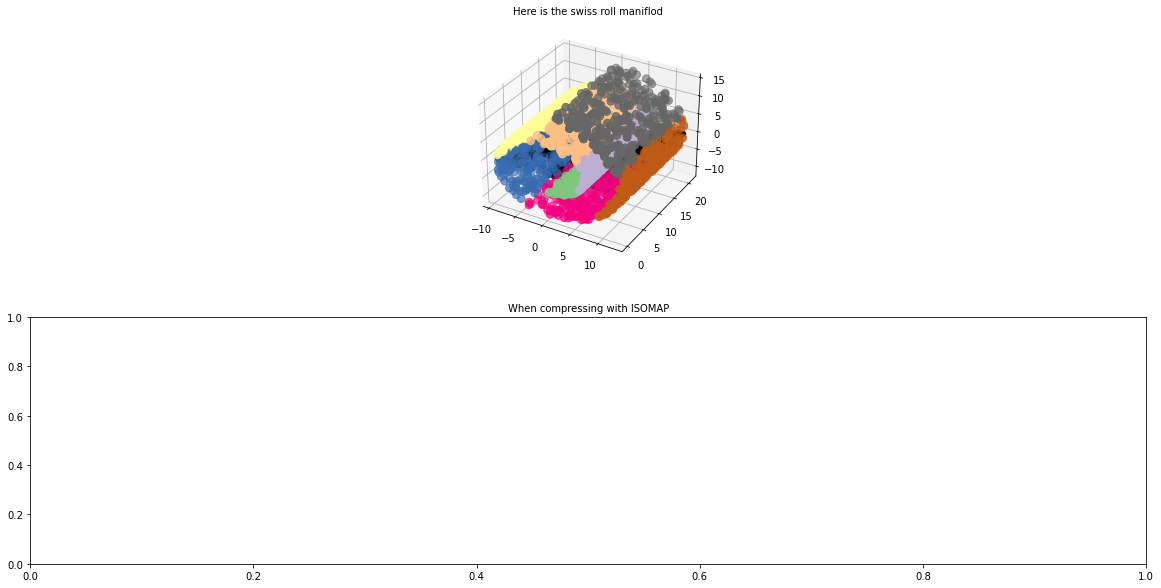

In [378]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(2, 1, 1,projection='3d')
ax.set_title('Here is the swiss roll maniflod', fontsize=10)
ax.scatter(X[:,0],X[:,1],X[:,2],c = color,cmap="Accent",s=60)
x = X[:,0][2:2500] 
y = X[:,1][2:2500] # Just as abovve, this time for column 1
ax.scatter(x,y,c = "black") #Now we randomly plot this in both 3D manifold (this may not be clearly visible as the  existing
ax.plot(x[2:4],y[2:4],c = "red")
ax = fig.add_subplot(2, 1, 2) 
#Now we plot 2D after ISOMAP...
ax.set_title('When compressing with ISOMAP', fontsize=10)
ax.scatter(manifold_iso_data[:,0],manifold_iso_data[:,1],c = color,cmap="Accent",s=60)
x = X[:,0][2:2500]#Now we plot the same 'black' samples, after ISOMAP in 2D and observe the distance in 2D.
y = X[:,1][2:2500]
ax.scatter(x,y,c = "black")
ax.plot(x[2:4],y[2:4],c = "red")
plt.show()

In [ ]:
#print(f'scale: {ch30_scale}, offset: {ch30_offset}')

In [ ]:
# Subset data. check  https://hdfeos.org/zoo/index_openLAADS_Examples.php
#data = data_raw[0,:,:].astype(np.double)
#np.shape(data)

In [ ]:
#debo trabajar con radiances o q?

In [ ]:
https://oceancolor.gsfc.nasa.gov/forum/oceancolor/topic_show.pl?tid=1049  #info about lat,lon
    https://stackoverflow.com/questions/29135885/netcdf4-extract-for-subset-of-lat-lon

In [ ]:
#PCA
https://www.sciencedirect.com/science/article/abs/pii/S0957417420301020
    https://link.springer.com/article/10.1007/s12524-018-0803-1  #'GET THE PAPER'++
        
        https://medium.com/analytics-vidhya/principal-component-analysis-pca-with-code-on-mnist-dataset-da7de0d07c22 #reader

In [ ]:
# more pca https://www.kaggle.com/akhileshrai/intro-cnn-pytorch-pca-tnse-isomap

In [ ]:
https://towardsdatascience.com/principal-component-analysis-in-depth-understanding-through-image-visualization-892922f77d9f

In [ ]:
    https://notebook.community/dennissergeev/classcode/notebooks/01_MODIS_L1B
    http://colah.github.io/posts/2014-10-Visualizing-MNIST/

In [ ]:
https://www.earthdatascience.org/courses/use-data-open-source-python/multispectral-remote-sensing/modis-data-in-python/
    https://towardsdatascience.com/pca-with-numpy-58917c1d0391
    https://towardsdatascience.com/dimensionality-reduction-of-a-color-photo-splitting-into-rgb-channels-using-pca-algorithm-in-python-ba01580a1118
        https://jakevdp.github.io/PythonDataScienceHandbook/04.07-customizing-colorbars.html
            https://ccplot.org/pub/resources/Aqua/MODIS%20Level%201B%20Product%20User%20Guide.pdf
                https://modis.gsfc.nasa.gov/about/specifications.php

In [ ]:
Histograma https://www.geeksforgeeks.org/plot-2-d-histogram-in-python-using-matplotlib/

https://www.youtube.com/watch?v=g-Hb26agBFg


In [ ]:
https://github.com/Sunjjjjjj/AAI_simulator_py2/blob/master/MODIS_rgb.py
    https://github.com/Sunjjjjjj/AAI_simulator_py2/blob/master/MODIS_combine.py
        https://github.com/Sunjjjjjj/AAI_simulator_py2/blob/master/MODIS_wget.py

In [ ]:
!ncks -d Longitude,4.5.,14.496. -d Latitude,47.5.,47.5.  MYD021KM.A2013122.1140.061.2018046032403.hdf  subset_MYD021KM.A2013122.1140.061.2018046032403.hdf


In [ ]:
!ncdump -h MYD021KM.A2013122.1140.061.2018046032403.hdf


In [ ]:
np.shape(latitude)
plt.scatter(latitude[0], latitude[1], alpha=0.5)
plt.title('Scatter plot latitude')
plt.xlabel('x')
plt.ylabel('y')
plt.show()